Linear model with final dataset prepared by Anzhelika 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline

C:\Users\luisf\AppData\Local\Temp\ipykernel_11960\2917017060.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("dates_shift.csv")

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter out the rows where the year is 2022
df = df[df['Date'].dt.year != 2022]

# Filter out rows where 'Country' is either 'RO', 'PL', or 'IT_SACO_DC'
df = df[~df['Country'].isin(['RO', 'PL', 'IT_SACO_DC'])]

# Define the columns to drop
columns_to_drop = ['year_2022', 'Country_RO', 'Country_PL', 'Country_IT_SACO_DC']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


In [4]:
df.shape

(2748804, 197)

In [5]:
df2 = pd.read_csv("dates_shift_exclude.csv")

In [6]:
df2.shape

(2748804, 197)

In [8]:
X = df.drop(columns=['Unnamed: 0', 'Date', 'Country', 'energy_price', 'energy_price_target'])

# Isolate the target variable into y
y = df['energy_price_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train_shift = X_train
X_test_shift = X_test
y_train_shift = y_train
y_test_shift = y_test
X_train_shift.to_csv('X_train_shift_shorter.csv', index=False)
X_test_shift.to_csv('X_test_shift_shorter.csv', index=False)

# Save the training and testing target sets to CSV
y_train_shift.to_csv('y_train_shift_shorter.csv', index=False)
y_test_shift.to_csv('y_test_shift_shorter.csv', index=False)

In [8]:
import pandas as pd

# Reading the CSV files into DataFrames
X_train_shift = pd.read_csv('X_train_shift_shorter.csv')
X_test_shift = pd.read_csv('X_test_shift_shorter.csv')
y_train_shift = pd.read_csv('y_train_shift_shorter.csv')
y_test_shift = pd.read_csv('y_test_shift_shorter.csv')

In [2]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_shift, y_train_shift)

LinearRegression()

In [3]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_shift)

# Calculate the MSE
mse = mean_squared_error(y_test_shift, y_pred)
print(f'Test MSE: {mse}')

Test MSE: 996.7128023011338


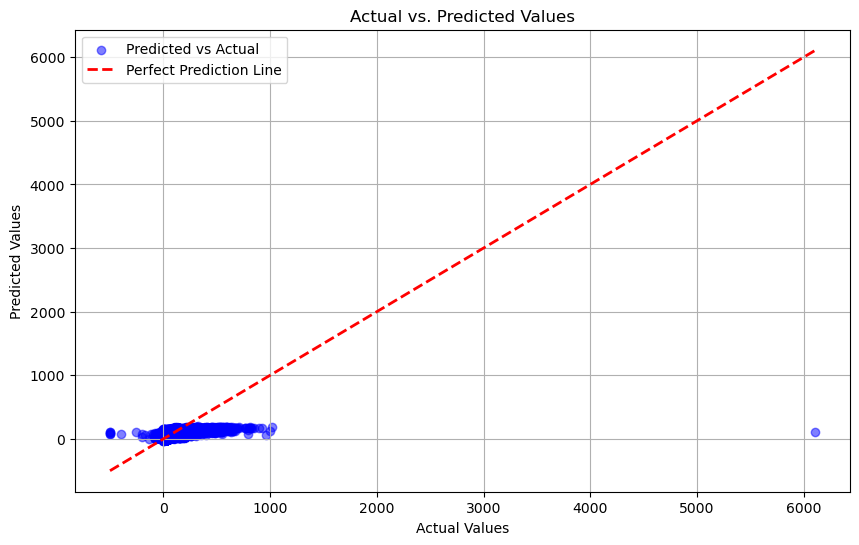

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot a line for perfect predictions
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Adding plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [14]:
#now we try with Lasso 
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [15]:
lasso = LassoCV(cv=TimeSeriesSplit(n_splits=20), random_state=42, alphas=np.logspace(-10, 10, 30))

# Fit Lasso
lasso.fit(X_train_shift, y_train_shift.values.ravel())

# Predict
y_pred_train = lasso.predict(X_train_shift)
y_pred_test = lasso.predict(X_test_shift)

# Calculate MSE
mse_train = mean_squared_error(y_train_shift, y_pred_train)
mse_test = mean_squared_error(y_test_shift, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Optimal Alpha: {lasso.alpha_}')

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20823570.156178407, tolerance: 20178.829153272523
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47720140.69564823, tolerance: 20178.829153272523
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38870497.3569857, tolerance: 20178.829153272523
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\skle

Training MSE: 937.7260234860673
Test MSE: 996.7269259592067
Optimal Alpha: 0.00016102620275609426


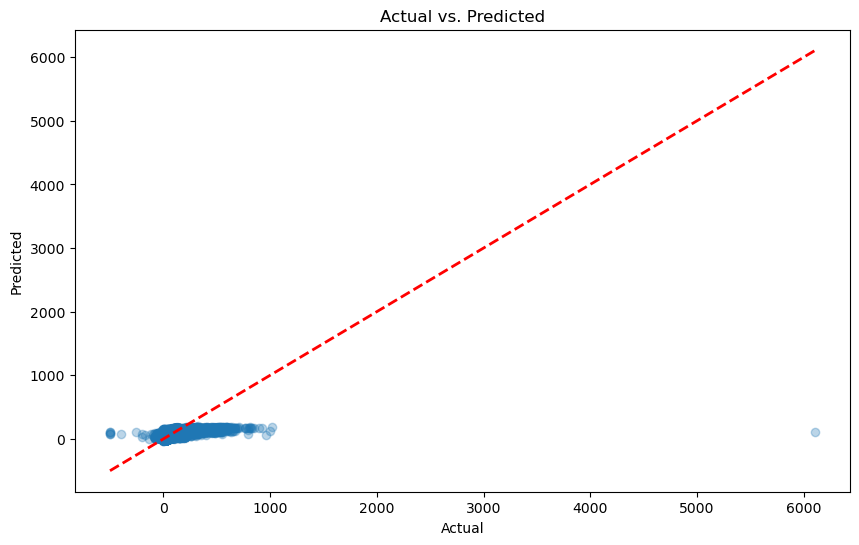

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred_test, alpha=0.3)
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

Now model with interactions experiment

In [2]:
energy_features = ['biomass', 'gas', 'nuclear']
years = [f'year_{year}' for year in range(2023,2024)]
#months = [f'month_{month}' for month in range(1, 13)]

# Create interaction terms in both training and testing datasets
for energy in energy_features:
    for year in years:
        X_train_shift[f'{energy}_{year}'] = X_train_shift[energy] * X_train_shift[year]
        X_test_shift[f'{energy}_{year}'] = X_test_shift[energy] * X_test_shift[year]

    #for month in months:
        #X_train_shift[f'{energy}_{month}'] = X_train_shift[energy] * X_train_shift[month]
        #X_test_shift[f'{energy}_{month}'] = X_test_shift[energy] * X_test_shift[month]

In [9]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
import numpy as np

lasso_with_interactions = LassoCV(cv=TimeSeriesSplit(n_splits=30), random_state=42, alphas=np.logspace(-10, 10, 30))
lasso_with_interactions.fit(X_train_shift, y_train_shift.values.ravel())

# Predict using the model
y_pred_test_interactions = lasso_with_interactions.predict(X_test_shift)

# Evaluate the model
mse_test_interactions = mean_squared_error(y_test_shift, y_pred_test_interactions)
print(f'MSE with Interactions: {mse_test_interactions}')
print(f'Optimal Alpha with Interactions: {lasso_with_interactions.alpha_}')

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14212992.457445629, tolerance: 13818.189173257804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33031970.62153111, tolerance: 13818.189173257804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31406312.338975403, tolerance: 13818.189173257804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sk

MSE with Interactions: 996.7149937370774
Optimal Alpha with Interactions: 3.290344562312671e-05


In [11]:
import joblib
import numpy as np
import pandas as pd

# Save the trained model to disk
joblib.dump(lasso_with_interactions, 'lasso_with_interactions_model.pkl')

# Convert predictions and true values to a DataFrame
predictions_df = pd.DataFrame({
    'y_true': y_test_shift.values.flatten(),  # Convert y_test_shift to NumPy array and flatten
    'y_pred': y_pred_test_interactions
})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions_lassoCV_with_interactions.csv', index=False)

# Save additional outputs if needed
np.save('mse_test_interactions.npy', mse_test_interactions)
np.save('optimal_alpha_with_interactions.npy', lasso_with_interactions.alpha_)


In [12]:
#to load saved output 

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model from disk
lasso_with_interactions = joblib.load('lasso_with_interactions_model.pkl')

# Load the predictions from the CSV file
predictions_df = pd.read_csv('predictions_lassoCV_with_interactions.csv')
y_true = predictions_df['y_true']
y_pred = predictions_df['y_pred']

# Load additional outputs if needed
mse_test_interactions = np.load('mse_test_interactions.npy')
optimal_alpha_with_interactions = np.load('optimal_alpha_with_interactions.npy')

print(f'MSE with Interactions: {mse_test_interactions}')
print(f'Optimal Alpha with Interactions: {optimal_alpha_with_interactions}')


MSE with Interactions: 996.7149937370774
Optimal Alpha with Interactions: 3.290344562312671e-05


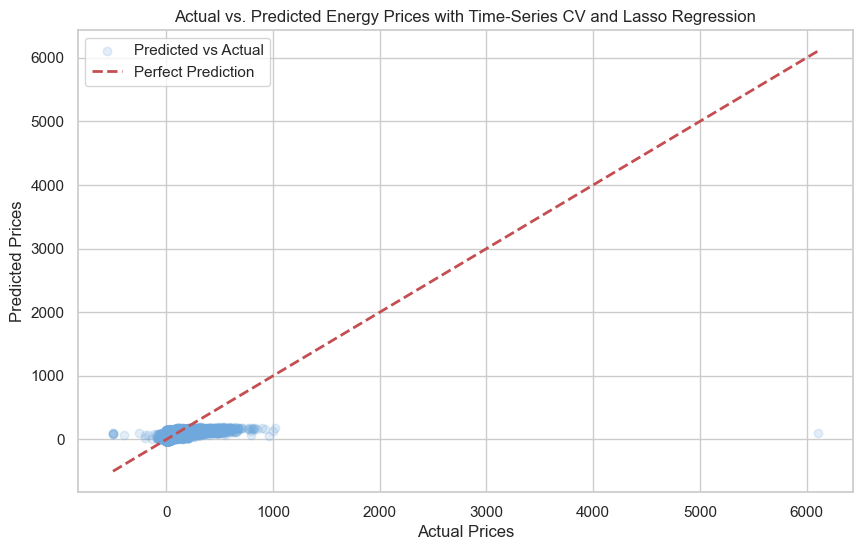

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred_test_interactions, color='#6fa8dc', alpha=0.2, label='Predicted vs Actual')

# Plot a reference line for perfect predictions
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2, label='Perfect Prediction')

# Adding titles and labels
plt.title('Actual vs. Predicted Energy Prices with Time-Series CV and Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Show the plot
plt.show()

#### Feature-importance matrix

In [3]:
X_train_shift = pd.read_csv('X_train_shift.csv')

Shape of X_train_shift: (2199043, 192)
Number of coefficients: 192


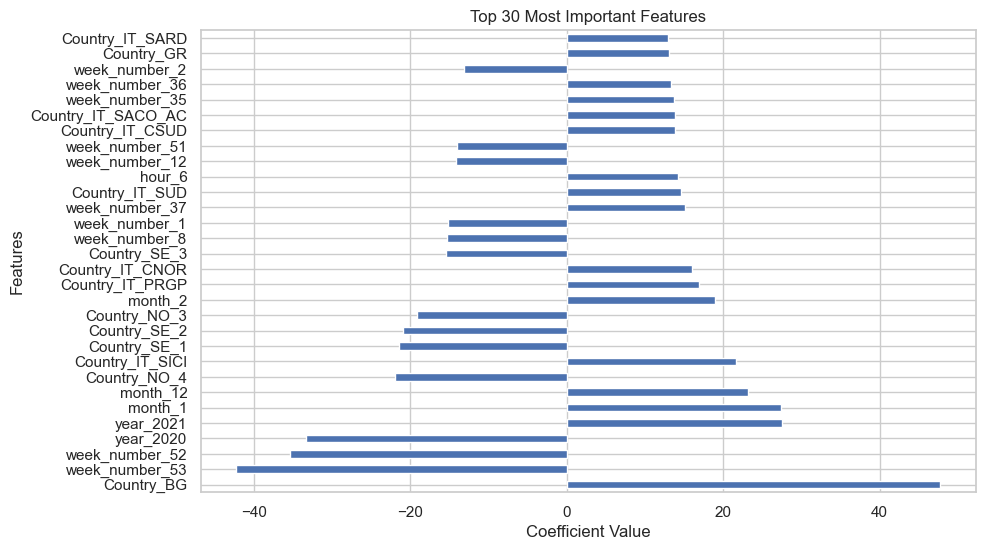

               Feature  Importance
0           Country_BG   47.753316
4            year_2021   27.495819
5              month_1   27.340312
6             month_12   23.129205
8      Country_IT_SICI   21.625468
12             month_2   18.988699
13     Country_IT_PRGP   16.925822
14     Country_IT_CNOR   15.996264
18      week_number_37   15.095194
19      Country_IT_SUD   14.557506
20              hour_6   14.219272
23     Country_IT_CSUD   13.845129
24  Country_IT_SACO_AC   13.802002
25      week_number_35   13.673408
26      week_number_36   13.339181
28          Country_GR   13.098964
29     Country_IT_SARD   12.968193
27       week_number_2  -13.115441
22      week_number_51  -14.061998
21      week_number_12  -14.145222
17       week_number_1  -15.131325
16       week_number_8  -15.329283
15        Country_SE_3  -15.428150
11        Country_NO_3  -19.075173
10        Country_SE_2  -20.893100
9         Country_SE_1  -21.413030
7         Country_NO_4  -21.926377
3            year_20

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Extract coefficients
coefficients = lasso_with_interactions.coef_

# Get column names from the DataFrame
feature_names = X_train_shift.columns

# Check the shape of X_train_shift and the number of coefficients
print(f'Shape of X_train_shift: {X_train_shift.shape}')
print(f'Number of coefficients: {len(coefficients)}')

# Ensure the lengths match
if len(coefficients) == len(feature_names):
    # Create a Series for the coefficients for easier plotting
    coeff_series_all = pd.Series(coefficients, index=feature_names)

    # Sort the coefficients by absolute value for better visualization
    sorted_coeffs_all = coeff_series_all.reindex(coeff_series_all.abs().sort_values(ascending=False).index)

    # Select the top 10 features with the largest absolute coefficients
    top_10_features = sorted_coeffs_all.head(30)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_10_features.plot(kind='barh')
    plt.title('Top 30 Most Important Features')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()

    # Create a feature-importance matrix
    feature_importance_matrix = pd.DataFrame({
        'Feature': top_10_features.index,
        'Importance': top_10_features.values
    }).sort_values(by='Importance', ascending=False)

    # Save the feature-importance matrix to a CSV file
    feature_importance_matrix.to_csv('top_30_feature_importance_matrix.csv', index=False)

    # Display the feature-importance matrix
    print(feature_importance_matrix)
else:
    print("Mismatch in the number of coefficients and feature names. Please check your preprocessing steps.")


accuracy metrics

In [25]:
from sklearn.metrics import accuracy_score

# Define a threshold for binary classification (e.g., using the mean of the training targets)
threshold = y_train_shift.values.ravel().mean()  # Ensure threshold is a scalar

# Binarize the predictions and the true values based on the threshold
y_pred_binary = (y_pred_test_interactions >= threshold).astype(int)
y_test_binary = (y_test_shift.values.ravel() >= threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy Score: {accuracy}')



Accuracy Score: 0.7978557955184162


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')
